### Baseline experiment

Experiment to compare the 4 Optimization algorithms before trying to improve sparse search

In [1]:
import HPO

import pysgpp

import matplotlib.pyplot as plt

import tensorflow as tf

import sklearn.metrics

from sklearn.model_selection import KFold

import numpy as np
import keras
from keras import backend as K

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from numpy.random import seed

import random

random.seed(1)
seed(2)
tf.random.set_seed(3)

def reset_seeds():
    np.random.seed(1)
    random.seed(2)
    tf.random.set_seed(3)

VERBOSE = 1
CV = 2 #[(slice(None), slice(None))]
TESTING = True

DATASETS = []

GRID_RESULT = []
RANDOM_RESULT = []
BAYESIAN_RESULT = []
SPARSE_RESULT = []
SPARSE_RESULT_OPTIMIZED = []

GRID_COST = []
RANDOM_COST = []
BAYESIAN_COST = []
SPARSE_COST = []
SPARSE_COST_OPTIMIZED = []

2023-05-08 19:29:20.043752: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 19:29:21.419552: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Hyperparameter space definition

In [2]:
ITER = 20

hyperparameterspace = {
    'epochs': ["interval-int", 1, 20],
    'batch_size': ["interval-int", 1, 200],
    'learning_rate': ["interval-log", 0.000000001, 0.1],
    'number_layers': ["interval-int", 1, 20],
    'neurons_per_layer': ["interval-int", 1, 50]
}

hyperparameterspace_special = {}
for key in hyperparameterspace.keys():
    liste = []
    for i in range(1, len(hyperparameterspace[key])):
        liste.append(hyperparameterspace[key][i])
    hyperparameterspace_special[key] = liste



### Model definition

In [3]:
def relu_advanced(x):
    return K.relu(x)


ACTIVATION_FUNCTION = relu_advanced

#INITIALIZER = tf.keras.initializers.RandomNormal(stddev=0.05, seed=42)

def create_model(learning_rate=0.0001, input_dim=10, number_layers=1, neurons_per_layer=20):
    # create model
    model = Sequential()

    model.add(Dense(neurons_per_layer, input_shape=(input_dim,), activation=ACTIVATION_FUNCTION))
    for _ in range(number_layers):
        model.add(Dense(neurons_per_layer, activation=ACTIVATION_FUNCTION))
    model.add(Dense(1, activation=None))

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


### Optimization

######################################################################################################################################################
Current Dataset: 1 of 2 with id: 233211
The average value for target is: tensor([3932.8892])
Min target: tensor([326.]) Max target: tensor([18823.])

################################################## Current Budget: 1 ##################################################

Performing grid search


2023-05-08 19:29:25.744140: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


With Hyperparameters: 
epochs: 10
batch_size: 100
learning_rate: 9.999999999999997e-06
number_layers: 10
neurons_per_layer: 25
Best score with Grid search: 1.6143192946910858

Performing random search
With Hyperparameters: 
epochs: 6
batch_size: 141
learning_rate: 0.02887080375665315
number_layers: 10
neurons_per_layer: 12
Best score with Random search: 1.5596132576465607

Performing bayesian optimization
Iterations took 13.881726852967404 seconds
With Hyperparameters: 
epochs: 5.0
batch_size: 97.0
learning_rate: 0.011817252964230529
number_layers: 14.0
neurons_per_layer: 42.0
Best score with Bayesian Optimization: 1.699840098619461

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 18480ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
1.6143192946910858
Optimizing (gradient descent)...
Done in 0ms.

Optim

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 27.041338440962136 seconds
With Hyperparameters: 
epochs: 14.0
batch_size: 138.0
learning_rate: 8.319771042400874e-06
number_layers: 8.0
neurons_per_layer: 23.0
Best score with Bayesian Optimization: 1.6307944059371948

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 19619ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
1.6143192946910858
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
1.6143192946910858
Resulting loss (Optimal point evaluated):
1.6143192946910858
Best score with Sparse Search: 1.6143192946910858 optimized: 1.6143192946910858
[1.6143192946910858]
[1.5596132576465607, 1.4331646859645844]

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 39.49486894690199 seconds
With Hyperparameters: 
epochs: 16.0
batch_size: 111.0
learning_rate: 3.824501991045703e-06
number_layers: 3.0
neurons_per_layer: 37.0
Best score with Bayesian Optimization: 1.4168411195278168

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 14300ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
1.6143192946910858
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
1.6143192946910858
Resulting loss (Optimal point evaluated):
1.6143192946910858
Best score with Sparse Search: 1.6143192946910858 optimized: 1.6143192946910858
[1.6143192946910858]
[1.5596132576465607, 1.4331646859645844, 

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 109.76303434500005 seconds
With Hyperparameters: 
epochs: 10.0
batch_size: 16.0
learning_rate: 7.081542422442598e-09
number_layers: 1.0
neurons_per_layer: 5.0
Best score with Bayesian Optimization: 0.7025745809078217

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 14425ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
1.6143192946910858
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
1.6143192946910858
Resulting loss (Optimal point evaluated):
1.6143192946910858
Best score with Sparse Search: 1.6143192946910858 optimized: 1.6143192946910858
[1.6143192946910858]
[1.5596132576465607, 1.4331646859645844, 1

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 100.17586577602196 seconds
With Hyperparameters: 
epochs: 7.0
batch_size: 53.0
learning_rate: 0.00027655953191863957
number_layers: 11.0
neurons_per_layer: 33.0
Best score with Bayesian Optimization: 0.46821509301662445

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 14108ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
1.6143192946910858
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
1.6143192946910858
Resulting loss (Optimal point evaluated):
1.6143192946910858
Best score with Sparse Search: 1.6143192946910858 optimized: 1.6143192946910858
[1.6143192946910858]
[1.5596132576465607, 1.4331646859645844

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 112.62465642904863 seconds
With Hyperparameters: 
epochs: 14.0
batch_size: 170.0
learning_rate: 4.096243477705092e-09
number_layers: 5.0
neurons_per_layer: 37.0
Best score with Bayesian Optimization: 1.0611524283885956

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 14141ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
1.6143192946910858
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
1.6143192946910858
Resulting loss (Optimal point evaluated):
1.6143192946910858
Best score with Sparse Search: 1.6143192946910858 optimized: 1.6143192946910858
[1.6143192946910858]
[1.5596132576465607, 1.4331646859645844,

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 472.8101287239697 seconds
With Hyperparameters: 
epochs: 3.0
batch_size: 68.0
learning_rate: 0.00025027578896554936
number_layers: 1.0
neurons_per_layer: 11.0
Best score with Bayesian Optimization: 0.8004886209964752

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 14162ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
1.6143192946910858
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
1.6143192946910858
Resulting loss (Optimal point evaluated):
1.6143192946910858
Best score with Sparse Search: 1.6143192946910858 optimized: 1.6143192946910858
[1.6143192946910858]
[1.5596132576465607, 1.4331646859645844, 1

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 262.90852273406927 seconds
With Hyperparameters: 
epochs: 18.0
batch_size: 122.0
learning_rate: 0.0007079129771491852
number_layers: 14.0
neurons_per_layer: 44.0
Best score with Bayesian Optimization: 0.48630672693252563

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 14288ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
1.6143192946910858
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
1.6143192946910858
Resulting loss (Optimal point evaluated):
1.6143192946910858
Best score with Sparse Search: 1.6143192946910858 optimized: 1.6143192946910858
[1.6143192946910858]
[1.5596132576465607, 1.433164685964584

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 386.7152506860439 seconds
With Hyperparameters: 
epochs: 12.0
batch_size: 56.0
learning_rate: 0.0001387276602669685
number_layers: 1.0
neurons_per_layer: 16.0
Best score with Bayesian Optimization: 0.33286185562610626

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 163386ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.49635954946279526
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
-0.6216001957654953
Resulting loss (Optimal point evaluated):
1.2956285774707794
Best score with Sparse Search: 0.49635954946279526 optimized: 1.2956285774707794
[1.6143192946910858]
[1.5596132576465607, 1.4331646859645844

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 1031.3549037089688 seconds
With Hyperparameters: 
epochs: 12.81875606697472
batch_size: 16.143251982159462
learning_rate: 2.2060549765268068e-05
number_layers: 12.293137687504673
neurons_per_layer: 18.40639085003327
Best score with Bayesian Optimization: 0.41152049601078033

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 163325ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.49635954946279526
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
-0.6216001957654953
Resulting loss (Optimal point evaluated):
1.2956285774707794
Best score with Sparse Search: 0.49635954946279526 optimized: 1.2956285774707794
[1.

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 193.78944859898183 seconds
With Hyperparameters: 
epochs: 3.562184306419
batch_size: 107.89741957490236
learning_rate: 0.00030539108269659276
number_layers: 15.156989254646156
neurons_per_layer: 31.1837306648031
Best score with Bayesian Optimization: 0.7000187933444977

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 164238ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.49635954946279526
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
-0.6216001957654953
Resulting loss (Optimal point evaluated):
1.2956285774707794
Best score with Sparse Search: 0.49635954946279526 optimized: 1.2956285774707794
[1.61431

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Iterations took 1422.6057528298697 seconds
With Hyperparameters: 
epochs: 16.0
batch_size: 133.0
learning_rate: 6.656669972288282e-05
number_layers: 6.0
neurons_per_layer: 42.0
Best score with Bayesian Optimization: 0.33283448219299316

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 163160ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.49635954946279526
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
-0.6216001957654953
Resulting loss (Optimal point evaluated):
1.2956285774707794
Best score with Sparse Search: 0.49635954946279526 optimized: 1.2956285774707794
[1.6143192946910858]
[1.5596132576465607, 1.43316468596458

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 405.4292321500252 seconds
With Hyperparameters: 
epochs: 5.0
batch_size: 104.0
learning_rate: 0.00027655953191863957
number_layers: 8.0
neurons_per_layer: 46.0
Best score with Bayesian Optimization: 0.5027492940425873

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 163984ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.49635954946279526
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
-0.6216001957654953
Resulting loss (Optimal point evaluated):
1.2956285774707794
Best score with Sparse Search: 0.49635954946279526 optimized: 1.2956285774707794
[1.6143192946910858]
[1.5596132576465607, 1.4331646859645844

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 226.12311638495885 seconds
With Hyperparameters: 
epochs: 11.0
batch_size: 92.0
learning_rate: 0.00045566089211717
number_layers: 2.0
neurons_per_layer: 22.0
Best score with Bayesian Optimization: 0.3725585415959358

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 163430ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.49635954946279526
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
-0.6216001957654953
Resulting loss (Optimal point evaluated):
1.2956285774707794
Best score with Sparse Search: 0.49635954946279526 optimized: 1.2956285774707794
[1.6143192946910858]
[1.5596132576465607, 1.4331646859645844, 

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Iterations took 362.42295275093056 seconds
With Hyperparameters: 
epochs: 11.0
batch_size: 43.0
learning_rate: 0.0036310333555889663
number_layers: 9.0
neurons_per_layer: 32.0
Best score with Bayesian Optimization: 0.38926494121551514

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 163820ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.49635954946279526
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
-0.6216001957654953
Resulting loss (Optimal point evaluated):
1.2956285774707794
Best score with Sparse Search: 0.49635954946279526 optimized: 1.2956285774707794
[1.6143192946910858]
[1.5596132576465607, 1.433164685964584

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Iterations took 830.1279850900173 seconds
With Hyperparameters: 
epochs: 17.0
batch_size: 19.0
learning_rate: 5.7168949241694903e-05
number_layers: 14.0
neurons_per_layer: 14.0
Best score with Bayesian Optimization: 0.3294152617454529

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 163822ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.49635954946279526
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
-0.6216001957654953
Resulting loss (Optimal point evaluated):
1.2956285774707794
Best score with Sparse Search: 0.49635954946279526 optimized: 1.2956285774707794
[1.6143192946910858]
[1.5596132576465607, 1.433164685964584

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 356.3354869350442 seconds
With Hyperparameters: 
epochs: 14.187834409677082
batch_size: 49.78700219132691
learning_rate: 0.001908707273042979
number_layers: 5.631136834078709
neurons_per_layer: 13.30921601096496
Best score with Bayesian Optimization: 0.6608529090881348

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 163888ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.49635954946279526
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
-0.6216001957654953
Resulting loss (Optimal point evaluated):
1.2956285774707794
Best score with Sparse Search: 0.49635954946279526 optimized: 1.2956285774707794
[1.61431

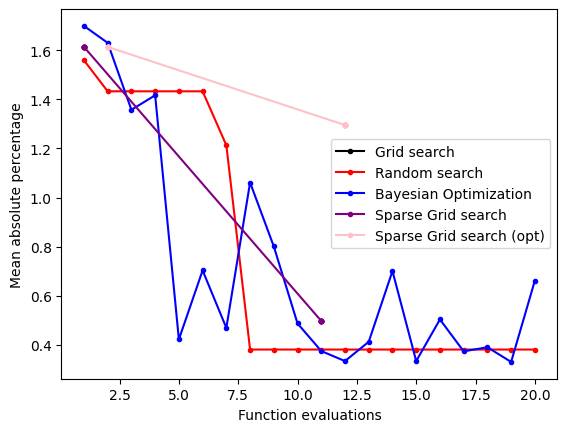

######################################################################################################################################################
Current Dataset: 2 of 2 with id: 359952
The average value for target is: tensor([50076.3906])
Min target: tensor([0.]) Max target: tensor([500001.])

################################################## Current Budget: 1 ##################################################

Performing grid search
With Hyperparameters: 
epochs: 10
batch_size: 100
learning_rate: 9.999999999999997e-06
number_layers: 10
neurons_per_layer: 25
Best score with Grid search: 0.6155448853969574

Performing random search
With Hyperparameters: 
epochs: 6
batch_size: 141
learning_rate: 0.02887080375665315
number_layers: 10
neurons_per_layer: 12
Best score with Random search: 0.38187162578105927

Performing bayesian optimization
Iterations took 6.564973527973052 seconds
With Hyperparameters: 
epochs: 5.0
batch_size: 97.0
learning_rate: 0.011817252964230529
number_layers: 

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 11.935140011948533 seconds
With Hyperparameters: 
epochs: 8.0
batch_size: 135.0
learning_rate: 0.011817252964230529
number_layers: 19.0
neurons_per_layer: 21.0
Best score with Bayesian Optimization: 0.3749261647462845

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 7196ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.6155448853969574
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
0.6155448853969574
Resulting loss (Optimal point evaluated):
0.6155448853969574
Best score with Sparse Search: 0.6155448853969574 optimized: 0.6155448853969574
[0.6155448853969574]
[0.38187162578105927, 0.38187162578105927]

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 21.12631694006268 seconds
With Hyperparameters: 
epochs: 10.0
batch_size: 97.0
learning_rate: 4.876377503619157e-06
number_layers: 14.0
neurons_per_layer: 42.0
Best score with Bayesian Optimization: 0.6347744166851044

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 7140ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.6155448853969574
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 1e-05
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
0.6155448853969574
Resulting loss (Optimal point evaluated):
0.6155448853969574
Best score with Sparse Search: 0.6155448853969574 optimized: 0.6155448853969574
[0.6155448853969574]
[0.38187162578105927, 0.38187162578105927,

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 66.81957930600038 seconds
With Hyperparameters: 
epochs: 4.0
batch_size: 185.0
learning_rate: 0.00034771255581796367
number_layers: 17.0
neurons_per_layer: 47.0
Best score with Bayesian Optimization: 0.36975838243961334

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 82722ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.3494676798582077
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
0.08339047431945801
Resulting loss (Optimal point evaluated):
0.6661050319671631
Best score with Sparse Search: 0.3494676798582077 optimized: 0.6661050319671631
[0.6155448853969574]
[0.38187162578105927, 0.3818716257810592

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 547.2683779581566 seconds
With Hyperparameters: 
epochs: 15.87034850589011
batch_size: 7.292405083138082
learning_rate: 3.489601113682822e-05
number_layers: 11.275198205119464
neurons_per_layer: 45.83081327412975
Best score with Bayesian Optimization: 0.35117676854133606

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 82032ms.
Solving linear system (automatic method)...
Done in 1ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.3494676798582077
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
0.08339047431945801
Resulting loss (Optimal point evaluated):
0.6661050319671631
Best score with Sparse Search: 0.3494676798582077 optimized: 0.6661050319671631
[0.615544

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 272.00821391906356 seconds
With Hyperparameters: 
epochs: 15.0
batch_size: 22.0
learning_rate: 0.0016999180942510544
number_layers: 10.0
neurons_per_layer: 43.0
Best score with Bayesian Optimization: 0.3252750039100647

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 82787ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.3494676798582077
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
0.08339047431945801
Resulting loss (Optimal point evaluated):
0.6661050319671631
Best score with Sparse Search: 0.3494676798582077 optimized: 0.6661050319671631
[0.6155448853969574]
[0.38187162578105927, 0.38187162578105927

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Iterations took 215.56862738286145 seconds
With Hyperparameters: 
epochs: 3.0
batch_size: 101.0
learning_rate: 0.009902518412290737
number_layers: 5.0
neurons_per_layer: 33.0
Best score with Bayesian Optimization: 0.3710206598043442

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 81469ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.3494676798582077
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
0.08339047431945801
Resulting loss (Optimal point evaluated):
0.6661050319671631
Best score with Sparse Search: 0.3494676798582077 optimized: 0.6661050319671631
[0.6155448853969574]
[0.38187162578105927, 0.38187162578105927, 

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 181.96823308215244 seconds
With Hyperparameters: 
epochs: 18.0
batch_size: 19.0
learning_rate: 0.0025485796296739697
number_layers: 11.0
neurons_per_layer: 40.0
Best score with Bayesian Optimization: 0.3325805068016052

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 81883ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.3494676798582077
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
0.08339047431945801
Resulting loss (Optimal point evaluated):
0.6661050319671631
Best score with Sparse Search: 0.3494676798582077 optimized: 0.6661050319671631
[0.6155448853969574]
[0.38187162578105927, 0.38187162578105927

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Iterations took 174.98125448508654 seconds
With Hyperparameters: 
epochs: 15.0
batch_size: 125.0
learning_rate: 0.006555198125962143
number_layers: 4.0
neurons_per_layer: 25.0
Best score with Bayesian Optimization: 0.361176073551178

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 81859ms.
Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.3494676798582077
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
0.08339047431945801
Resulting loss (Optimal point evaluated):
0.6661050319671631
Best score with Sparse Search: 0.3494676798582077 optimized: 0.6661050319671631
[0.6155448853969574]
[0.38187162578105927, 0.38187162578105927, 

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 336.0850840929197 seconds
With Hyperparameters: 
epochs: 8.000007260901349
batch_size: 28.999985626386042
learning_rate: 0.001991164529336838
number_layers: 7.999994344151415
neurons_per_layer: 27.00002421721477
Best score with Bayesian Optimization: 0.3353843688964844

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 82616ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.3494676798582077
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
0.08339047431945801
Resulting loss (Optimal point evaluated):
0.6661050319671631
Best score with Sparse Search: 0.3494676798582077 optimized: 0.6661050319671631
[0.61554488

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 171.02983454498462 seconds
With Hyperparameters: 
epochs: 8.0
batch_size: 61.0
learning_rate: 0.002722382109639215
number_layers: 6.0
neurons_per_layer: 20.0
Best score with Bayesian Optimization: 0.342080220580101

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 82521ms.
Solving linear system (automatic method)...
Done in 1ms.

Optimal hyperparameters so far:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.001
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss:
0.3494676798582077
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after optimization:
epochs: 10.5
batch_size: 100.5
learning_rate: 0.1
number_layers: 10.5
neurons_per_layer: 25.5
Resulting loss (Optimal value from optimization):
0.08339047431945801
Resulting loss (Optimal point evaluated):
0.6661050319671631
Best score with Sparse Search: 0.3494676798582077 optimized: 0.6661050319671631
[0.6155448853969574]
[0.38187162578105927, 0.38187162578105927, 0.

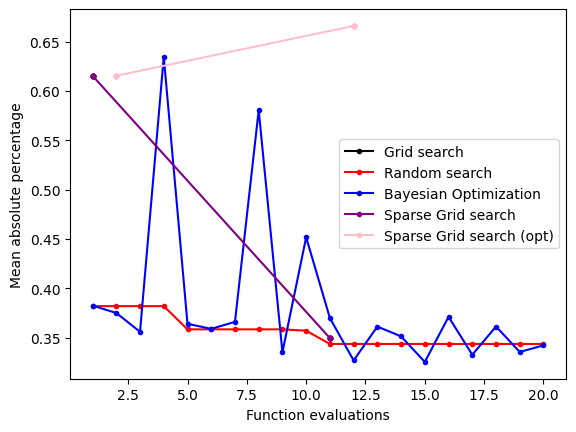

In [4]:
ids = [233211, 359952]#, 359931, 359949, 359938]
# [359940, 317614, 359934, 359946, 359932, 233214, 359943]

for i in range(len(ids)):
    print("######################################################################################################################################################")
    print("Current Dataset:", (i+1), "of", len(ids), "with id:", ids[i])

    dataset = HPO.Dataset(task_id=ids[i])

    print("The average value for target is:", sum(
        dataset.get_Y()/len(dataset.get_Y())))
    print("Min target:", min(dataset.get_Y()),
          "Max target:", max(dataset.get_Y()))

    current_dataset_grid = []
    current_dataset_random = []
    current_dataset_bayesian = []
    current_dataset_sparse = []
    current_dataset_sparse_opt = []

    current_dataset_grid_cost = []
    current_dataset_random_cost = []
    current_dataset_bayesian_cost = []
    current_dataset_sparse_cost = []
    current_dataset_sparse_opt_cost = []

    ################## MODEL AND FUNCTION DEFINITION ####################

    def evaluate_model(epochs, batch_size, learning_rate, number_of_layers, neurons_per_layer, deterministic=True):

        # return epochs + batch_size + learning_rate + number_of_layers + neurons_per_layer

        kfold = KFold(n_splits=CV)

        split = (kfold.split(dataset.get_X(), dataset.get_Y()))

        values = []

        numeric_features = [not x for x in dataset.get_categorical_indicator()]
        numeric_transformer = Pipeline(
            steps=[("imputer", SimpleImputer(strategy="median")),
                   ("scaler", StandardScaler())]
        )

        categorical_transformer = Pipeline(
            steps=[
                ("encoder", OneHotEncoder(
                    handle_unknown="infrequent_if_exist", sparse_output=False)),
                # ("selector", SelectPercentile(chi2, percentile=50)),
            ]
        )

        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numeric_features),
                ("cat", categorical_transformer,
                 dataset.get_categorical_indicator()),
            ]
        )

        for i, (train_index, test_index) in enumerate(split):

            if deterministic:
                reset_seeds()

            X_train = dataset.get_X()[train_index]
            Y_train = dataset.get_Y()[train_index]

            X_val = dataset.get_X()[test_index]
            Y_val = dataset.get_Y()[test_index]

            preprocessor.fit(X_train, Y_train)

            X_train = preprocessor.transform(X_train)
            X_val = preprocessor.transform(X_val)

            regressor = KerasRegressor(model=create_model,
                                       learning_rate=learning_rate,
                                       input_dim=len(
                                           X_train[0]),
                                       number_layers=number_of_layers,
                                       neurons_per_layer=neurons_per_layer,
                                       verbose=0)

            regressor = TransformedTargetRegressor(regressor=regressor,
                                                   transformer=StandardScaler())

            regressor.fit(X_train, Y_train, epochs=epochs,
                          batch_size=batch_size, shuffle=False)

            Y_predicted = regressor.predict(X_val)
            # error = sklearn.metrics.mean_absolute_error(Y_predicted, Y_val)
            error = sklearn.metrics.mean_absolute_percentage_error(
                Y_predicted, Y_val)
            values.append(error)

            del regressor
            K.clear_session()

        result = sum(values)/len(values)
        return result

    def blackboxfunction_grid(params):
        # index = int(params[0]*(len(hyperparameterspace_special["loss"])-1))
        # hyperparameterspace_special["loss"][index]

        epochs = int(params[0])

        batch_size = int(params[1])

        learning_rate = params[2]

        number_of_layers = int(params[3])

        neurons_per_layer = int(params[4])

        return evaluate_model(epochs, batch_size, learning_rate, number_of_layers, neurons_per_layer)

    def blackboxfunction_random(params):
        # index = int(params[0]*(len(hyperparameterspace_special["loss"])-1))
        # hyperparameterspace_special["loss"][index]

        epochs = int(params[0])

        batch_size = int(params[1])

        learning_rate = params[2]

        number_of_layers = int(params[3])

        neurons_per_layer = int(params[4])

        return evaluate_model(epochs, batch_size, learning_rate, number_of_layers, neurons_per_layer, deterministic=False)


    def blackboxfunction_bayesian(params):
        # index = int(params[0]*(len(hyperparameterspace_special["loss"])-1))
        # hyperparameterspace_special["loss"][index]

        epochs = int(params[0])

        batch_size = int(params[1])

        model_learning_rate = 10 ** (params[2])

        number_of_layers = int(params[3])

        neurons_per_layer = int(params[4])

        return evaluate_model(epochs, batch_size, model_learning_rate, number_of_layers, neurons_per_layer, deterministic=False)

    ##################### Function for sparse grid search #####################

    class ExampleFunction(pysgpp.ScalarFunction):

        def __init__(self):
            super(ExampleFunction, self).__init__(
                len(hyperparameterspace.keys()))

        def eval(self, x):
            # index = int(x[0]*(len(hyperparameterspace_special["loss"])-1))
            # hyperparameterspace_special["loss"][index]

            epochs = int(HPO.from_standard(
                hyperparameterspace_special["epochs"][0], hyperparameterspace_special["epochs"][1], x[0]))

            batch_size = int(HPO.from_standard(
                hyperparameterspace_special["batch_size"][0], hyperparameterspace_special["batch_size"][1], x[1]))

            model_learning_rate = HPO.from_standard_log(hyperparameterspace_special["learning_rate"][
                                                        0], hyperparameterspace_special["learning_rate"][1], x[2])

            number_of_layers = int(HPO.from_standard(
                hyperparameterspace_special["number_layers"][0], hyperparameterspace_special["number_layers"][1], x[3]))

            neurons_per_layer = int(HPO.from_standard(
                hyperparameterspace_special["neurons_per_layer"][0], hyperparameterspace_special["neurons_per_layer"][1], x[4]))

            return evaluate_model(epochs, batch_size, model_learning_rate, number_of_layers, neurons_per_layer)

    ##### For each dataset: run models with different budget #####
    BUDGET = 1
    for j in range(ITER):

        BUDGET = (j+1) # BUDGET + 2 ** len(hyperparameterspace.keys())

        print("\n################################################## Current Budget:",
              BUDGET, "##################################################")

        ############################## GRID SEARCH #######################
        print("\nPerforming grid search")
        grid_sizes = [x ** len(hyperparameterspace) for x in range(9)]
        if BUDGET in grid_sizes:
            optimization = HPO.GridSearchOptimization(
                dataset, blackboxfunction_grid, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, cv=CV)

            result, cost = optimization.fit()

            index_best = 0
            for m in range(len(result)):
                if result[m][1] < result[index_best][1]:
                    index_best = m

            best_score = result[index_best][1]
            best_params = result[index_best][0]

            if VERBOSE > 0:
                print("With Hyperparameters: ")
                m = 0
                for key in hyperparameterspace.keys():
                    if hyperparameterspace[key][0] == "list":
                        index = int(
                            best_params[m]*(len(hyperparameterspace_special[key])-1))
                        print(key + ": " +
                            str(hyperparameterspace_special[key][index]))
                    else:
                        print(key + ": " + str(best_params[m]))
                    m += 1

            print("Best score with Grid search:", best_score)

            current_dataset_grid.append(best_score)
            current_dataset_grid_cost.append(cost)

            K.clear_session()

        # ########################### RANDOM SEARCH #######################
        print("\nPerforming random search")

        optimization = HPO.RandomSearchOptimization(
            dataset, blackboxfunction_random, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, cv=CV)

        result, cost = optimization.fit()

        index_best = 0
        for m in range(len(result)):
            if result[m][1] < result[index_best][1]:
                index_best = m

        best_score = result[index_best][1]
        best_params = result[index_best][0]

        if VERBOSE > 0:
            print("With Hyperparameters: ")
            m = 0
            for key in hyperparameterspace.keys():
                if hyperparameterspace[key][0] == "list":
                    index = int(
                        best_params[m]*(len(hyperparameterspace_special[key])-1))
                    print(key + ": " +
                          str(hyperparameterspace_special[key][index]))
                else:
                    print(key + ": " + str(best_params[m]))
                m += 1

        print("Best score with Random search:", best_score)

        current_dataset_random.append(best_score)
        current_dataset_random_cost.append(cost)

        K.clear_session()

        ########################### BAYESIAN OPT #####################
        print("\nPerforming bayesian optimization")

        optimization = HPO.BayesianOptimization(
            dataset, blackboxfunction_bayesian, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE)

        result, cost = optimization.fit()

        index_best = 0
        for m in range(len(result)):
            if result[m][1] < result[index_best][1]:
                index_best = m

        best_score = result[index_best][1]
        best_params = result[index_best][0]

        if VERBOSE > 0:
            print("With Hyperparameters: ")
            m = 0
            for key in hyperparameterspace.keys():
                if hyperparameterspace[key][0] == "list":
                    index = int(
                        best_params[m]*(len(hyperparameterspace_special[key])-1))
                    print(key + ": " +
                          str(hyperparameterspace_special[key][index]))
                elif hyperparameterspace[key][0] == "interval-log":
                    print(key + ": " + str(10 ** best_params[m]))
                else:
                    print(key + ": " + str(best_params[m]))
                m += 1

        print("Best score with Bayesian Optimization:", best_score)

        current_dataset_bayesian.append(best_score)
        current_dataset_bayesian_cost.append(BUDGET)

        K.clear_session()

        ########################### SPARSE OPT ############################
        print("\nPerforming sparse search")

        f = ExampleFunction()

        optimization = HPO.SparseGridSearchOptimization(
            dataset, f, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, degree=2, adaptivity=0.95, optimizer="gradient_descent")

        result = optimization.fit()

        print("Best score with Sparse Search:",
              result[0][1], "optimized:", result[0][3])

        current_dataset_sparse.append(result[0][1])
        current_dataset_sparse_opt.append(result[0][3])

        current_dataset_sparse_cost.append(result[1])
        current_dataset_sparse_opt_cost.append(result[1]+1)

        K.clear_session()

        print(current_dataset_grid)
        print(current_dataset_random)
        print(current_dataset_bayesian)
        print(current_dataset_sparse)
        print(current_dataset_sparse_opt)

    GRID_RESULT.append(current_dataset_grid)
    RANDOM_RESULT.append(current_dataset_random)
    BAYESIAN_RESULT.append(current_dataset_bayesian)
    SPARSE_RESULT.append(current_dataset_sparse)
    SPARSE_RESULT_OPTIMIZED.append(current_dataset_sparse_opt)

    GRID_COST.append(current_dataset_grid_cost)
    RANDOM_COST.append(current_dataset_random_cost)
    BAYESIAN_COST.append(current_dataset_bayesian_cost)
    SPARSE_COST.append(current_dataset_sparse_cost)
    SPARSE_COST_OPTIMIZED.append(current_dataset_sparse_opt_cost)

    print("###################### Current dataset",
          ids[i], "######################")

    dataset = HPO.Dataset(task_id=ids[i])

    print("Target average:", sum(
        dataset.get_Y()/len(dataset.get_Y())))
    print("Min target:", min(dataset.get_Y()),
          "Max target:", max(dataset.get_Y()))

    # plotting the points
    plt.plot(GRID_COST[i], GRID_RESULT[i], '.-',
             color='black', label="Grid search")
    plt.plot(RANDOM_COST[i], RANDOM_RESULT[i], '.-',
             color='red', label="Random search")
    plt.plot(BAYESIAN_COST[i], BAYESIAN_RESULT[i], '.-',
             color='blue', label="Bayesian Optimization")
    plt.plot(SPARSE_COST[i], SPARSE_RESULT[i], '.-',
             color='purple', label="Sparse Grid search")
    plt.plot(SPARSE_COST_OPTIMIZED[i], SPARSE_RESULT_OPTIMIZED[i],
             '.-', color='pink', label="Sparse Grid search (opt)")

    # naming the x axis
    plt.xlabel('Function evaluations')
    # naming the y axis
    plt.ylabel('Mean absolute percentage')

    # show a legend on the plot
    plt.legend()
    plt.savefig("Current_tests/task_id"+str(ids[i]))
    # function to show the plot
    plt.show()


### Print lines

###################### Current dataset 233211 ######################
Target average: tensor([3932.8892])
Min target: tensor([326.]) Max target: tensor([18823.])


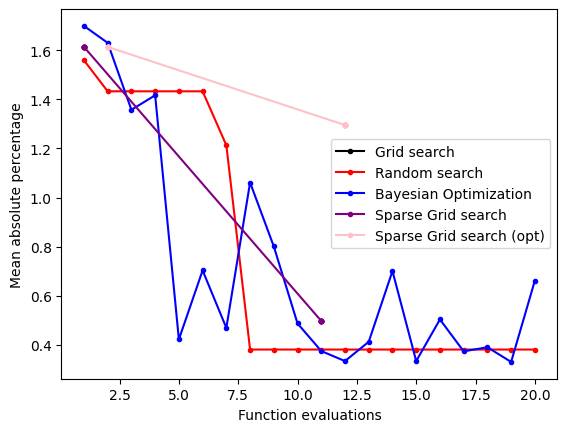

###################### Current dataset 359952 ######################
Target average: tensor([50076.3906])
Min target: tensor([0.]) Max target: tensor([500001.])


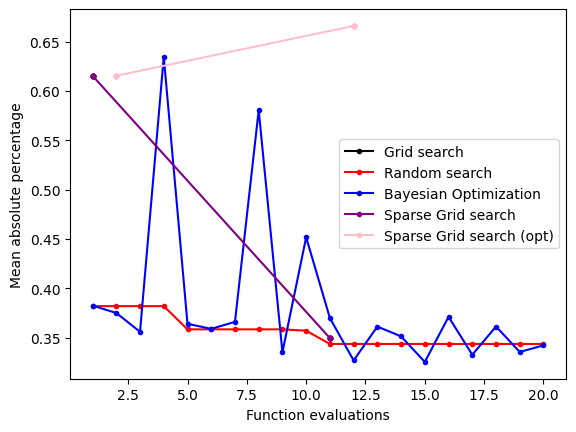

In [5]:
for i in range(len(ids)):
    print("###################### Current dataset", ids[i], "######################")
    
    dataset = HPO.Dataset(task_id=ids[i])
    
    print("Target average:", sum(
        dataset.get_Y()/len(dataset.get_Y())))
    print("Min target:", min(dataset.get_Y()),
          "Max target:", max(dataset.get_Y()))


    # plotting the points 
    plt.plot(GRID_COST[i], GRID_RESULT[i], '.-', color='black', label="Grid search")
    plt.plot(RANDOM_COST[i], RANDOM_RESULT[i], '.-', color='red', label="Random search")
    plt.plot(BAYESIAN_COST[i], BAYESIAN_RESULT[i], '.-', color='blue', label="Bayesian Optimization")
    plt.plot(SPARSE_COST[i], SPARSE_RESULT[i], '.-', color='purple', label="Sparse Grid search")
    plt.plot(SPARSE_COST_OPTIMIZED[i], SPARSE_RESULT_OPTIMIZED[i], '.-', color='pink', label="Sparse Grid search (opt)")
    
    # naming the x axis
    plt.xlabel('Function evaluations')
    # naming the y axis
    plt.ylabel('Mean absolute percentage')
    
    # show a legend on the plot
    plt.legend()
    
    # function to show the plot
    plt.show()